<a href="https://colab.research.google.com/github/Morteza-Waskasi/The-Data-Incubator/blob/master/stl10_Fv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Convolutional Neural Network, Data Augmentation and    Transfer Learning to Classify Images with TensorFlow and Keras



This notebook performs object classification with Convolutional Neural Network, Data Augmentation and Transfer Learning. 

**The Dataset( [STL-10](https://cs.stanford.edu/~acoates/stl10/))**


*   10 classes: **airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck**.
*   Images are 96x96 pixels, color(RGB<font color='red'>R</font><font color='green'>G</font><font color='blue'>B</font>).
*  5000 training images, 8000 test images.
*  The size of the dataset is about 3 GB. 
*   The STL-10 dataset is an image recognition dataset for developing unsupervised feature learning, deep learning, self-taught learning algorithms.



![](https://cs.stanford.edu/~acoates/stl10/images.png)


**Figure 1. Ten classes of dataset.**

**Importing libraries and installing packages**

In [0]:
import os
from google.colab import auth
from oauth2client.client import GoogleCredentials
import tensorflow as tf
import keras.utils
from keras import utils as np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
#import scipy
#from scipy import misc
from __future__ import print_function
import sys
import os, sys, tarfile, errno
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline
from keras.utils import np_utils
############################
!pip install PyDrive
!pip install tsne
!pip install np_utils
!pip install pyunpack
!pip install patool
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
####################################
from tsne import bh_sne
from sklearn.manifold import TSNE

In [0]:
#from IPython.display import Image
#Image(filename='STL10_10Classes.png')

**Loading data from Goole Drive to Google Colab**

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
link = 'https://drive.google.com/open?id=1zjd8r30XBGYObNOXPuODhpeK4eny_wbO' # The shareable link
link2 = 'https://drive.google.com/open?id=1-9SA81z5z5ZPdad9WFyoBH4T7jU_vQJj'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

fluff, id2 = link2.split('=')
print (id2) # Verify that you have everything after '='

In [0]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('stl10_binary.tar')
##############################
downloaded2 = drive.CreateFile({'id':id2})
downloaded2.GetContentFile('STL10_10Classes.png')

In [0]:
from pyunpack import Archive
Archive('stl10_binary.tar').extractall('/content/')
!tar -xvf stl10_binary.tar

In [0]:
train_X= np.fromfile('stl10_binary/train_X.bin', dtype=np.uint8)
train_y= np.fromfile('stl10_binary/train_y.bin', dtype=np.uint8)
test_X= np.fromfile('stl10_binary/test_X.bin', dtype=np.uint8)
test_y= np.fromfile('stl10_binary/test_y.bin', dtype=np.uint8)

In [0]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

In [0]:
Im_train_X=np.reshape(train_X,(-1,3,96,96))
Im_test_X=np.reshape(test_X,(-1,3,96,96))

In [0]:
print(Im_train_X.shape)
print(Im_test_X.shape)

In [0]:
Im_train_X = np.transpose(Im_train_X, (0, 3, 2, 1))
Im_test_X = np.transpose(Im_test_X, (0, 3, 2, 1))
#train_y=np.reshape(train_y,(len(train_y),1))
#test_y=np.reshape(test_y,(len(test_y),1))


In [0]:
print(Im_train_X.shape)
print(train_y.shape)
print(Im_test_X.shape)
print(test_y.shape)

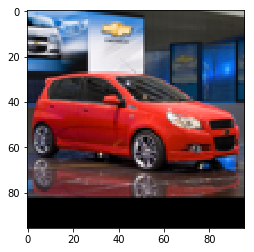

In [179]:
    plt.imshow(Im_train_X[1147])
   # plt.imshow(Im_test_X[1000])
    plt.show()

In [0]:
print(Im_train_X[1][1][1])
print(Im_test_X[1][1][1])

In [0]:
Im_train_X = Im_train_X.astype('float32') / 255
Im_test_X = Im_test_X.astype('float32') / 255

In [0]:
print(Im_train_X[1][1][1])
print(Im_test_X[1][1][1])

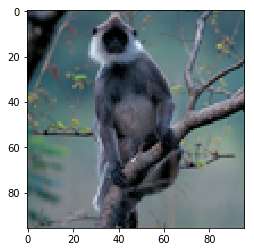

In [15]:
    #plt.imshow(Im_train_X[10])
    plt.imshow(Im_train_X[1111])
    #plt.imshow(Im_test_X[1000])
    plt.show()

In [0]:
from keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [0]:
print(Im_train_X.shape)
print(train_y.shape)
print(Im_test_X.shape)
print(test_y.shape)

In [0]:
np.max(train_y[:][:,0])

In [0]:
train_y=train_y[:][:,1:11]
test_y=test_y[:][:,1:11]

In [0]:
print(Im_train_X.shape)
print(train_y.shape)
print(Im_test_X.shape)
print(test_y.shape)

# Covolutional Neural Network

**Covolutional Neural Network**

*   optimizer=adam
*   3 hidden lyers 

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 96x96 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 10 output neurons. It will contain a value from 0-10 for all classes.
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [35]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
__________

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
history = model.fit(Im_train_X, train_y, batch_size=64, epochs=45, verbose=1, validation_data=(Im_test_X, test_y))

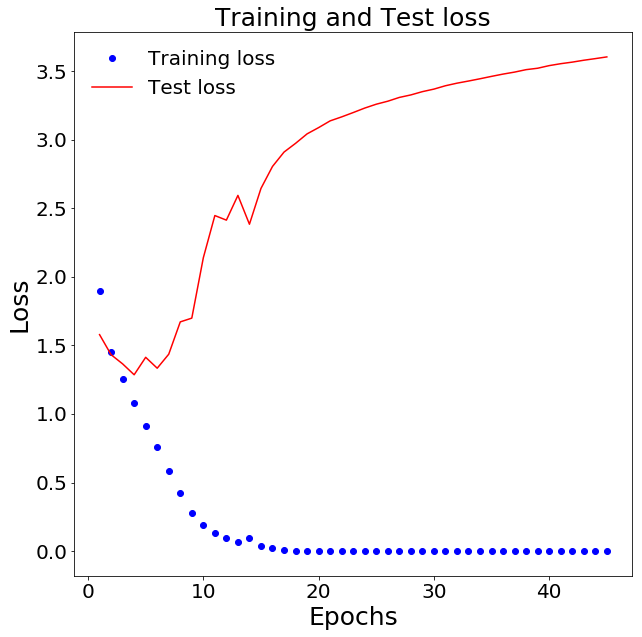

In [30]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and Test loss',fontsize=25)
plt.xlabel('Epochs',fontsize=25)
plt.ylabel('Loss',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=0,fontsize=20,ncol=1, frameon=False)
plt.show()

**Figure 2. The plot of Loss vs the number of epochs for training and test images by using CNN with two layers. The accuracy for training set is ~ 100% and for test set is ~59% .**

**Covolutional Neural Network**

*   optimizer=RMSprop(lr=0.001)
*   3 hidden lyers 

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 96x96 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 10 output neurons. It will contain a value from 0-10 for all classes.
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
__________

In [0]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [0]:
history = model.fit(Im_train_X, train_y, batch_size=50, epochs=15, verbose=1, validation_data=(Im_test_X, test_y))

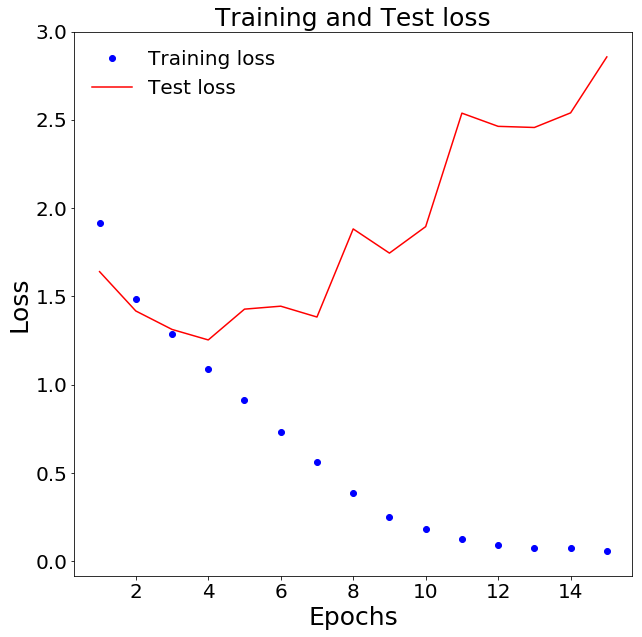

In [46]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and Test loss',fontsize=25)
plt.xlabel('Epochs',fontsize=25)
plt.ylabel('Loss',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=0,fontsize=20,ncol=1, frameon=False)

**Figure 3. The plot of Loss vs the number of epochs (15) for training and test images by using CNN with two layers. The accuracy for training set is ~ 98%  and for test set is ~ 54% . As clear the model has overfitting problem.**

# Applying Augmentation to avoid overfitting

In [0]:
print(Im_train_X.shape)
print(train_y.shape)
print(Im_test_X.shape)
print(test_y.shape)

In [0]:
# Using data in the original format as It's going to be rescaled in memory.
train_X= np.fromfile('stl10_binary/train_X.bin', dtype=np.uint8)
train_y= np.fromfile('stl10_binary/train_y.bin', dtype=np.uint8)
test_X= np.fromfile('stl10_binary/test_X.bin', dtype=np.uint8)
test_y= np.fromfile('stl10_binary/test_y.bin', dtype=np.uint8)
########################
Im_train_X=np.reshape(train_X,(-1,3,96,96))
Im_test_X=np.reshape(test_X,(-1,3,96,96))
##################################
Im_train_X = np.transpose(Im_train_X, (0, 3, 2, 1))
Im_test_X = np.transpose(Im_test_X, (0, 3, 2, 1))
#train_y=np.reshape(train_y,(len(train_y),1))
#test_y=np.reshape(test_y,(len(test_y),1))

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_datagen.flow(Im_train_X, train_y, batch_size=32),
                              steps_per_epoch=len(Im_train_X) / 32,
                              epochs=20,
                              validation_data=validation_datagen.flow(Im_test_X, test_y, batch_size=32),
                              validation_steps=len(Im_test_X) / 32)

model.evaluate(Im_test_X, test_y)

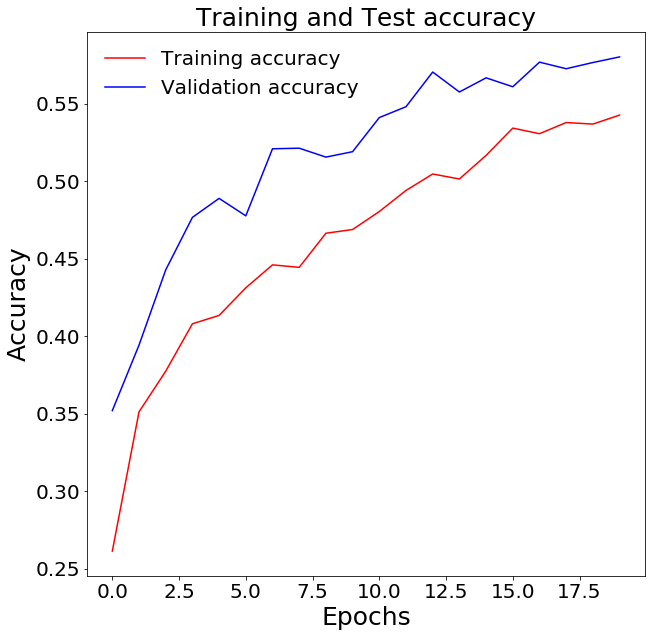

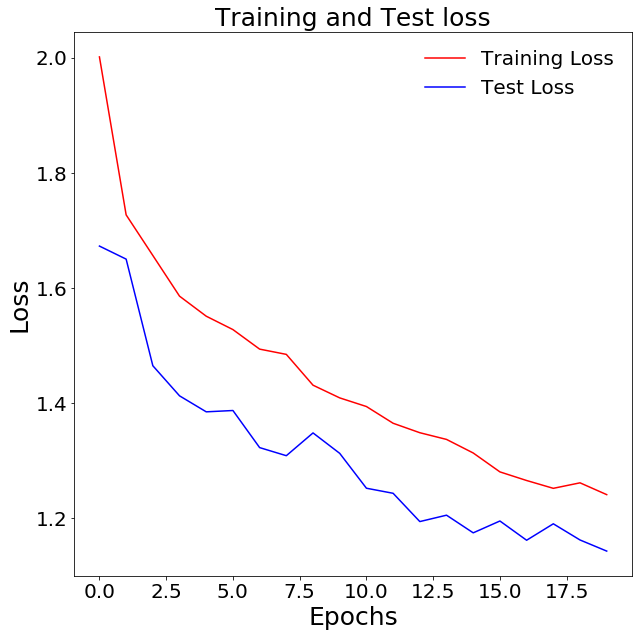

In [121]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(10,10))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Test accuracy',fontsize=25)
plt.xlabel('Epochs',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=0,fontsize=20,ncol=1, frameon=False)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Test Loss')
plt.title('Training and Test loss')
plt.title('Training and Test loss',fontsize=25)
plt.xlabel('Epochs',fontsize=25)
plt.ylabel('Loss',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=0,fontsize=20,ncol=1, frameon=False)
plt.show()

**Figure 4. The plot of Loss & Accuracy vs the number of epochs (20) for training and test images by using data augmentation CNN with two layers. The accuracy for training set is ~53% and for test set is ~58%. The overfitting problem is solved by applying data augmentation but the model is still suffering from low accuracy.**

# Transfer Learning 
**In this step, the object classification with transfer learning is performed. A more refined approach would be to leverage a network pre-trained on a large dataset. Such a network would have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.  Instead of building a Convolutional Neural Network from scratch, transfer learning is used to take a pre-trained Convolutional Neural Network  that has demonstrated a great performance in object classification tasks. Keras makes it very simple to implement pre-trained Convolutional Neural Network architectures. The InceptionV3 architecture, pre-trained on the ImageNet dataset, is applied. After importing the necessary Python class, it’s only one line of code to get the model, along with the pre-trained weights.  The pre-trained InceptionV3 architecture is stored in the variable model. The final layer of the network is removed and the resultant network is saved in a new model.**

In [0]:
# Using data in the original format as It's going to be rescaled in memory.
train_X= np.fromfile('stl10_binary/train_X.bin', dtype=np.uint8)
train_y= np.fromfile('stl10_binary/train_y.bin', dtype=np.uint8)
test_X= np.fromfile('stl10_binary/test_X.bin', dtype=np.uint8)
test_y= np.fromfile('stl10_binary/test_y.bin', dtype=np.uint8)
########################
Im_train_X=np.reshape(train_X,(-1,3,96,96))
Im_test_X=np.reshape(test_X,(-1,3,96,96))
##################################
Im_train_X = np.transpose(Im_train_X, (0, 3, 2, 1))
Im_test_X = np.transpose(Im_test_X, (0, 3, 2, 1))
#train_y=np.reshape(train_y,(len(train_y),1))
#test_y=np.reshape(test_y,(len(test_y),1))

In [0]:
print(Im_train_X.shape)
print(train_y.shape)
print(Im_test_X.shape)
print(test_y.shape)

In [0]:
# load inceptionV3 model and  remove final classification layers
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(139, 139, 3))
print('model loaded')

In [0]:
! pip install scipy==1.2.1
import scipy.misc
scipy.misc.imread
# ! pip install Pillow

In [0]:
# obtain bottleneck features (train)
if os.path.exists('inception_features_train.npz'):
    print('bottleneck features detected (train)')
    features = np.load('inception_features_train.npz')['features']
else:
    print('bottleneck features file not detected (train)')
    print('calculating now ...')
    # pre-process the train data
    big_x_train = np.array([scipy.misc.imresize(Im_train_X[i], (139, 139, 3)) 
                            for i in range(0, len(Im_train_X))]).astype('float32')
    inception_input_train = preprocess_input(big_x_train)
    print('train data preprocessed')
    # extract, process, and save bottleneck features
    features = model.predict(inception_input_train)
    features = np.squeeze(features)
    np.savez('inception_features_train', features=features)
print('bottleneck features saved (train)')

**Visualize Bottleneck Features by using t-SNE**

For dimensionality reduction the t-SNE and Principal Component Analysis(PCA) techniques can be used to reduce the array-lengths of the transfer values to two so they can be plotted.
The plot below shows the resulting two dimensional points using t-SNE technique, where points are color-coded based on the object class contained in the corresponding image.
InceptionV3 model tested out the content in the image, where points containing objects from the same class are mostly confined to nearby regions in the two dimensional plot. Thus, training a classifier on the bottleneck features should yield a decent performance.

What we see form t-SNE plot is that the Inception model has been able to separate the classes. It looks like there are some overlaps between classes. We can see that the Inception model has been able to properly separate images in our dataset. The model was able to extract useful information from the images in our dataset. 

tsne features detected (test)
tsne features obtained


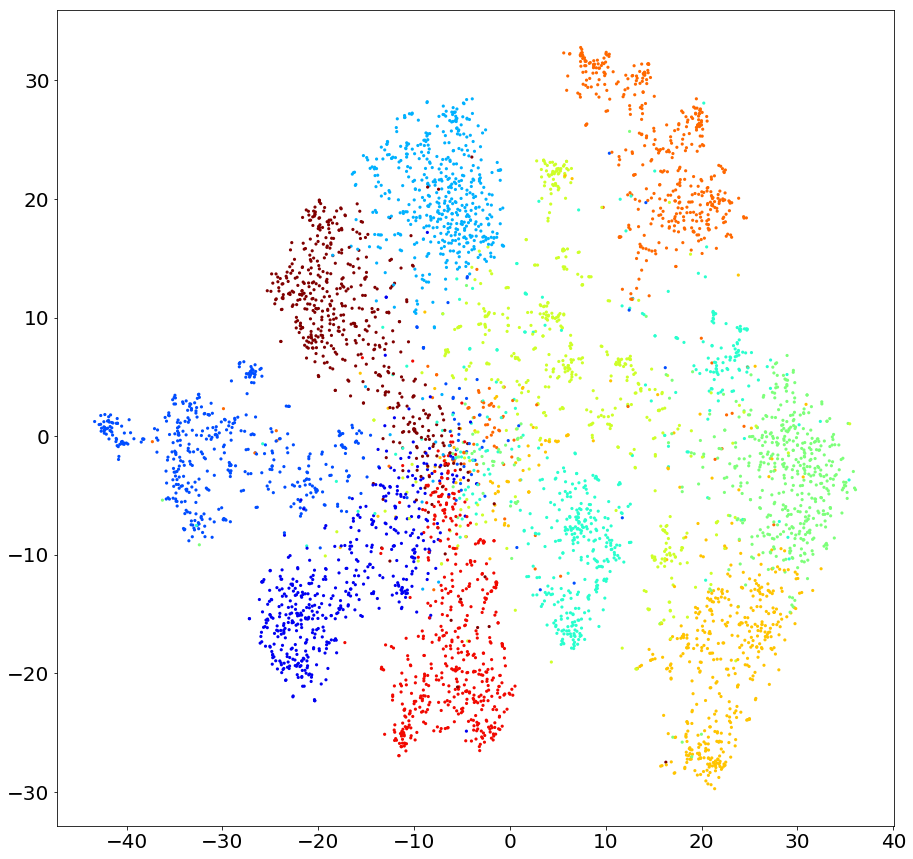

In [32]:
# reshape bottleneck features + reduce dimensionality with t-SNE
if os.path.exists('tsne_features.npz'):
    print('tsne features detected (test)')
    tsne_features = np.load('tsne_features.npz')['tsne_features']
else:
    print('tsne features not detected (test)')
    print('calculating now ...')
    tsne_features = bh_sne(features.reshape([features.shape[0], np.prod(features.shape[1:])]).astype('float64')[:25000])
    np.savez('tsne_features', tsne_features=tsne_features)
print('tsne features obtained')

# plot the features
plt.figure(figsize=(15,15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=plt.cm.jet(train_y/10), s=10, edgecolors='none')
plt.show()

**Figure 5. The t-SNE plot shows that the InceptionV3 model has been able to separate the ten classes in our dataset. The transfer values are properly catogorized by the Inception model.**

In [0]:

# obtain bottleneck features (test)
if os.path.exists('inception_features_test.npz'):
    print('bottleneck features detected (test)')
    features_test = np.load('inception_features_test.npz')['features_test']
else:
    print('bottleneck features file not detected (test)')
    print('calculating now ...')
    # pre-process the test data
    big_x_test = np.array([scipy.misc.imresize(Im_test_X[i], (139, 139, 3)) 
                       for i in range(0, len(Im_test_X))]).astype('float32')
    inception_input_test = preprocess_input(big_x_test)
    # extract, process, and save bottleneck features (test)
    features_test = model.predict(inception_input_test)
    features_test = np.squeeze(features_test)
    np.savez('inception_features_test', features_test=features_test)
print('bottleneck features saved (test)')

**Train a Shallow Neural Network**

In [0]:
# one-hot encode the labels
train_y = np_utils.to_categorical(train_y, 11)
test_y = np_utils.to_categorical(test_y, 11)

In [0]:
train_y=train_y[:][:,1:11]
test_y=test_y[:][:,1:11]

In [0]:
print(Im_train_X.shape)
print(train_y.shape)
print(Im_test_X.shape)
print(test_y.shape)

In [0]:
from keras.callbacks import ModelCheckpoint   
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D

model = Sequential()
model.add(Conv2D(filters=100, kernel_size=2, input_shape=features.shape[1:]))
model.add(Dropout(0.4))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.best.hdf5', 
                               verbose=1, save_best_only=True)
history =model.fit(features, train_y, batch_size=50, epochs=100,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

In [25]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(features_test, test_y, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 91.2750%


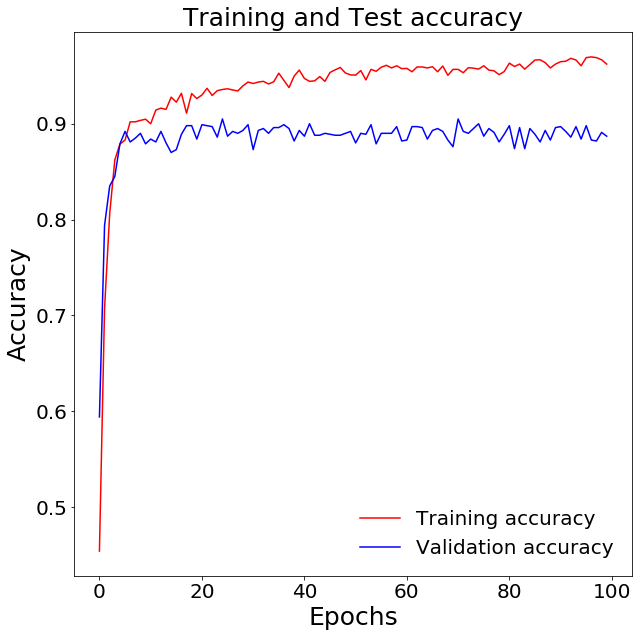

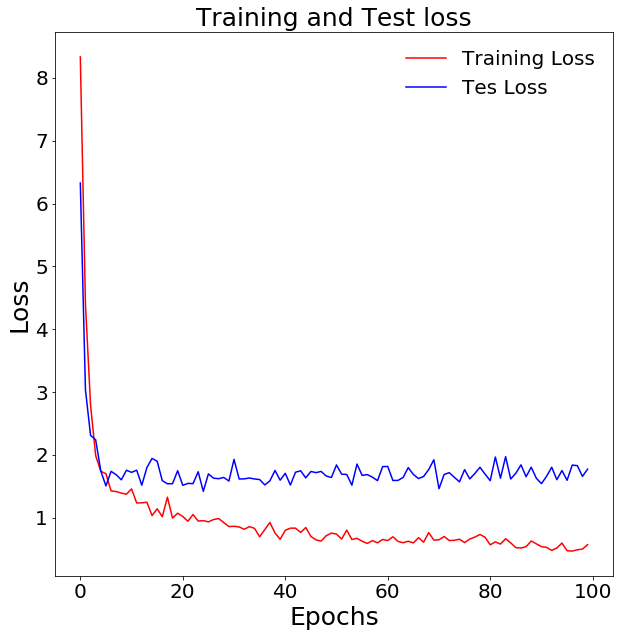

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(10,10))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Test accuracy',fontsize=25)
plt.xlabel('Epochs',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=0,fontsize=20,ncol=1, frameon=False)


plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Tes Loss')
plt.title('Training and Test loss',fontsize=25)
plt.xlabel('Epochs',fontsize=25)
plt.ylabel('Loss',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=0,fontsize=20,ncol=1, frameon=False)

plt.show()

**Figure 6. The plot of Loss & Accuracy vs the number of epochs (100) for training and test images by using transfer learning Shallow Neural Network. The accuracy of test set is ~ 91.3%.**

# Future Work


Transfer learning  provides interesting possibilities to support medical procedures and treatment.
My interest is image recognition for medical purposes.  Computer vision is useful in many medical disciplines that rely on imaging, including radiology, MRI, oncology and radiation therapy.
I'm going to apply computer vision techniques like DNN,  CNN, TensorFlow, Keara,  and transfer-learning on medical images to provide a useful model for medical treatment. 